# 绘制动态时钟

完成如下效果图，时间随系统时钟而变。

![](http://pic.ex2tron.top/cv2_draw_clock_dynamic_sample.gif)

## 绘制表盘

表盘上只有60条分/秒刻线和12条小时刻线，当然还有表盘的外部轮廓圆，也就是重点在如何画72根线。先把简单的圆画出来：

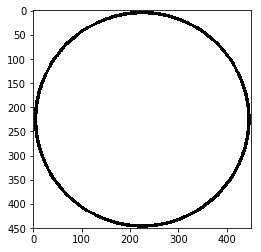

In [13]:
import cv2
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

margin=5 #上下左右边距
radius=220 #圆的半径
center=(center_x,center_y)=(225,225) #圆心

img=np.zeros((450,450,3),np.uint8)
img=img+255
cv2.circle(img,center,radius,(0,0,0),thickness=5)
plt.imshow(img[:,:,::-1])

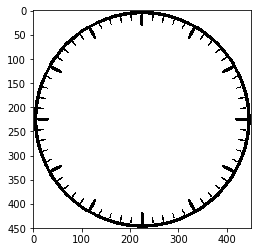

In [14]:
pt1=[]
# 画出60条秒线和分钟的刻度线
for i in range(60):
    x1=center_x+(radius-margin)*math.cos(i*6*np.pi/180.0)
    y1=center_y+(radius-margin)*math.sin(i*6*np.pi/180.0)
    pt1.append((int(x1),int(y1)))
    x2=center_x+(radius-15)*math.cos(i*6*np.pi/180.0)
    y2=center_y+(radius-15)*math.sin(i*6*np.pi/180.0)
    cv2.line(img,pt1[i],(int(x2),int(y2)),(0,0,0),thickness=2)

for i in range(12):
    x=center_x+(radius-25)*math.cos(i*30*np.pi/180.0)
    y=center_y+(radius-25)*math.sin(i*30*np.pi/180.0)
    cv2.line(img,pt1[i*5],(int(x),int(y)),(0,0,0),thickness=5)
plt.imshow(img[:,:,::-1])

In [15]:
while(1):
    # 不断拷贝表盘图，才能更新绘制，不然会重叠在一起
    temp = np.copy(img)
    # 5. 获取系统时间，画出动态的时-分-秒三条刻线
    now_time = datetime.datetime.now()
    hour, minute, second = now_time.hour, now_time.minute, now_time.second
    # 画秒刻线
    # OpenCV中的角度是顺时针计算的，所以需要转换下
    sec_angle = second*6+270 if second <= 15 else (second-15)*6
    sec_x = center_x+(radius-margin)*math.cos(sec_angle*np.pi/180.0)
    sec_y = center_y+(radius-margin)*math.sin(sec_angle*np.pi/180.0)
    cv2.line(temp, center, (int(sec_x), int(sec_y)), (203, 222, 166), 2)
    # 画分刻线
    min_angle = minute*6+270 if minute <= 15 else (minute-15)*6
    min_x = center_x+(radius-35)*math.cos(min_angle*np.pi/180.0)
    min_y = center_y+(radius-35)*math.sin(min_angle*np.pi/180.0)
    cv2.line(temp, center, (int(min_x), int(min_y)), (186, 199, 137), 8)
    # 画时刻线
    hour_angle = hour*30+270 if hour <= 3 else (hour-3)*30
    hour_x = center_x+(radius-65)*math.cos(hour_angle*np.pi/180.0)
    hour_y = center_y+(radius-65)*math.sin(hour_angle*np.pi/180.0)
    cv2.line(temp, center, (int(hour_x), int(hour_y)), (169, 198, 26), 15)
    # 6. 添加当前日期文字
    font = cv2.FONT_HERSHEY_SIMPLEX
    time_str = now_time.strftime("%d/%m/%Y")
    cv2.putText(img, time_str, (135, 275), font, 1, (0, 0, 0), 2)
    cv2.imshow('clocking', temp)
    if cv2.waitKey(1) == 27:  # 按下ESC键退出
        break